In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.6)

In [103]:
df = pd.read_csv('data/customers.csv', sep=';')
df['counter'] = 1
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,counter
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


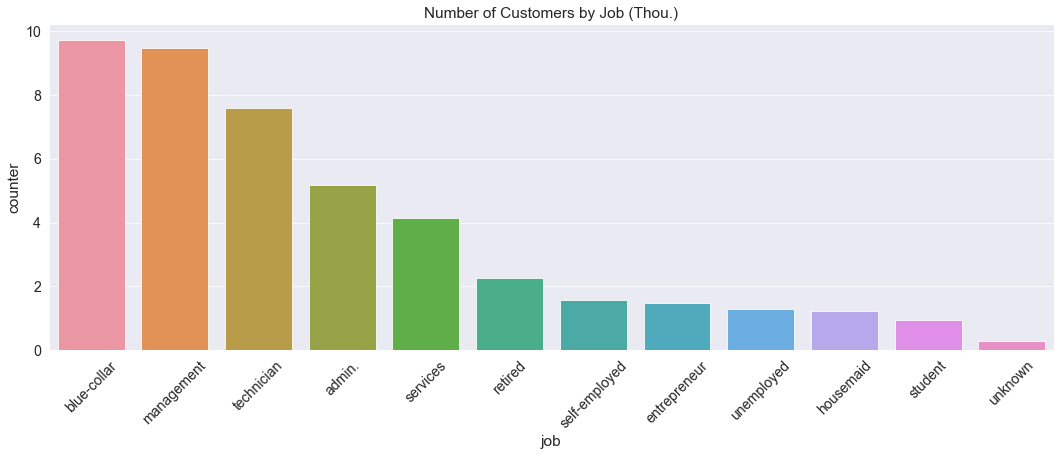

In [108]:
df_job = df[['job', 'counter']].groupby(by=['job'], as_index=False).sum().sort_values(by=['counter'], ascending=False)
df_job['counter'] = df_job['counter'] / 1000

plt.figure(figsize=(18, 6))
plt.xticks(rotation=45)
plt.title('Number of Customers by Job (Thou.)')
sns.barplot(x='job', y='counter', data=df_job);

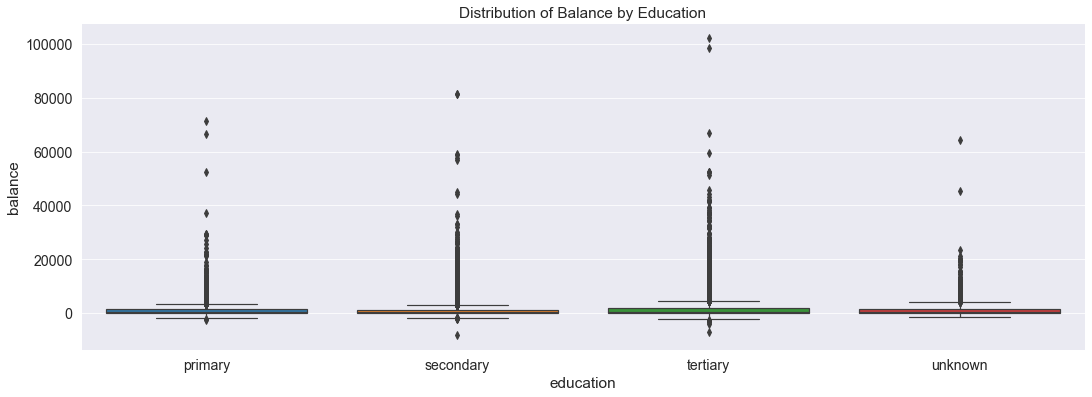

In [121]:
plt.figure(figsize=(18, 6))
plt.title('Distribution of Balance by Education')
sns.boxplot(x='education', y='balance', data=df, order=['primary', 'secondary', 'tertiary', 'unknown']);

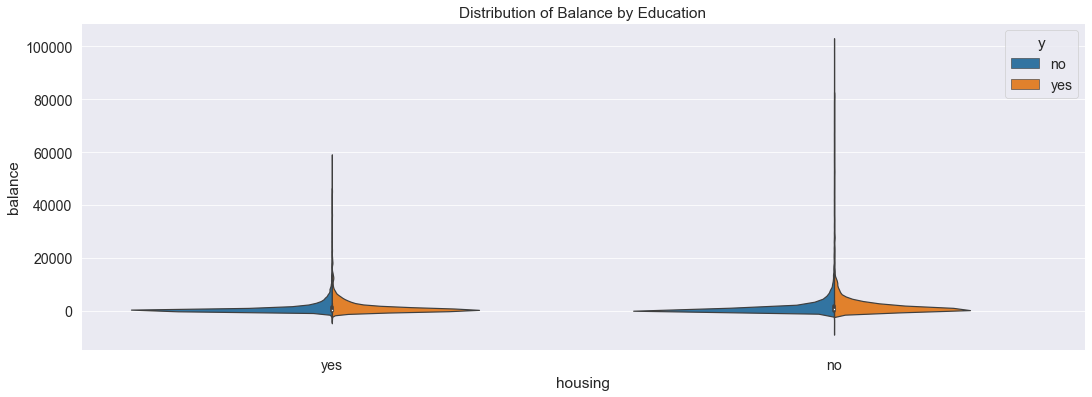

In [124]:
plt.figure(figsize=(18, 6))
plt.title('Distribution of Balance by Education')
sns.violinplot(x='housing', y='balance', data=df, hue='y', split=True);

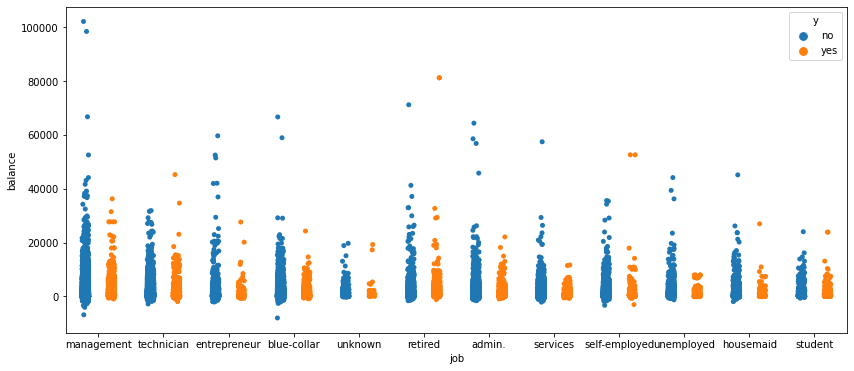

In [60]:
plt.figure(figsize=(14, 6))
sns.stripplot(x='job', y='balance', data=df, jitter=True, hue='y', dodge=True);

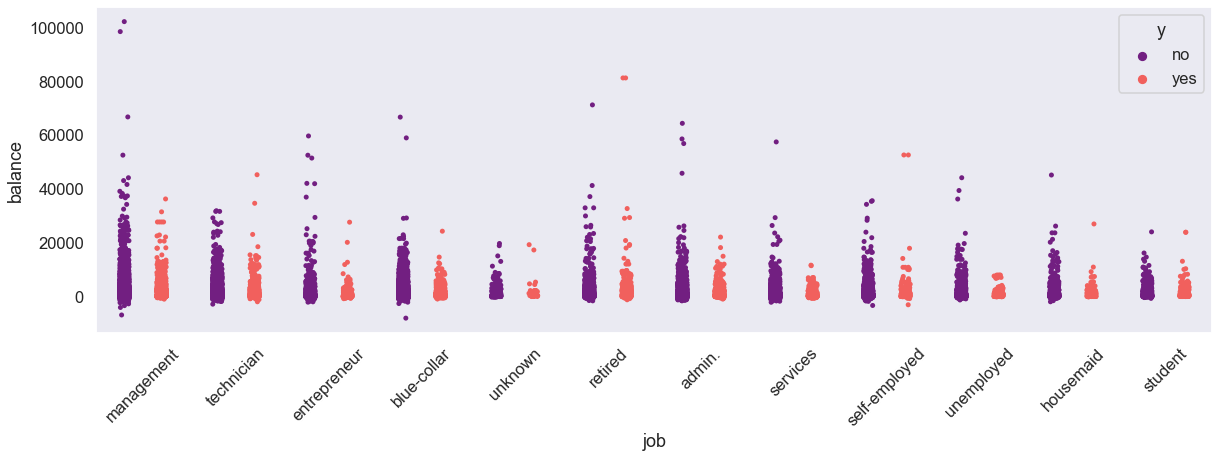

In [75]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='job', y='balance', data=df, jitter=True, hue='y', dodge=True, palette='magma');
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

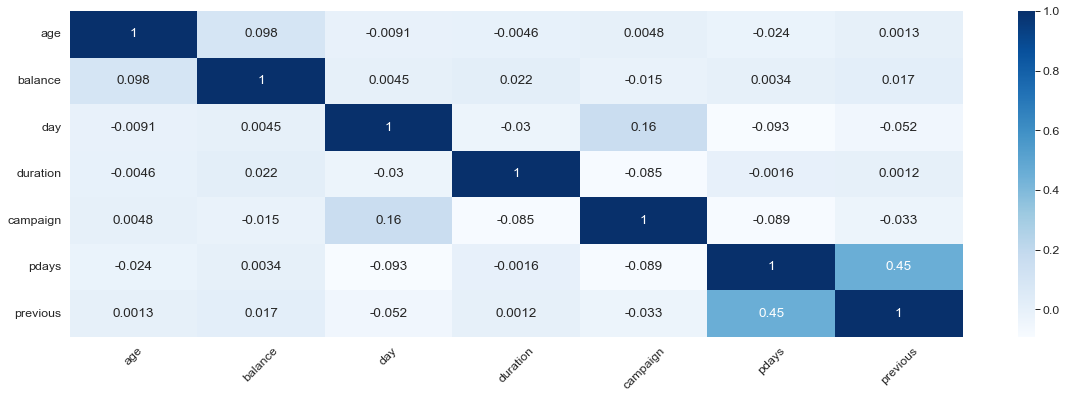

In [81]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
sns.set_context('paper', font_scale=1.4)

sns.heatmap(df.corr(), annot=True, cmap='Blues');

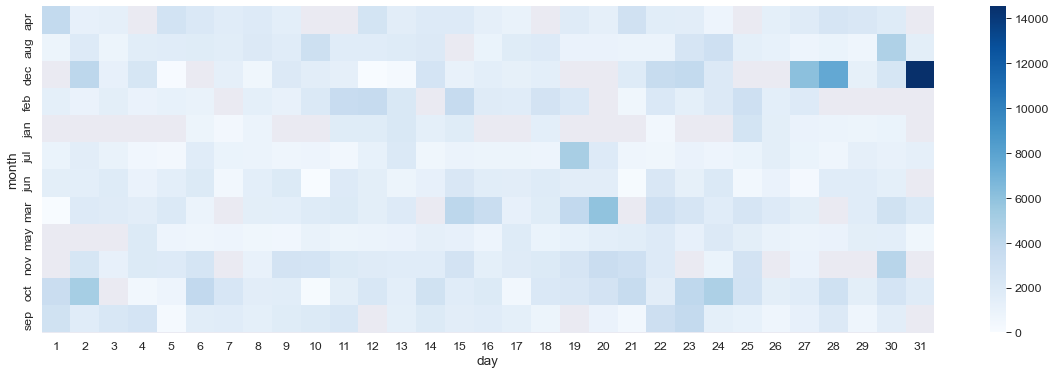

In [96]:
plt.figure(figsize=(20, 6))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(df.pivot_table(index='month', columns='day', values='balance').round(), cmap='Blues');

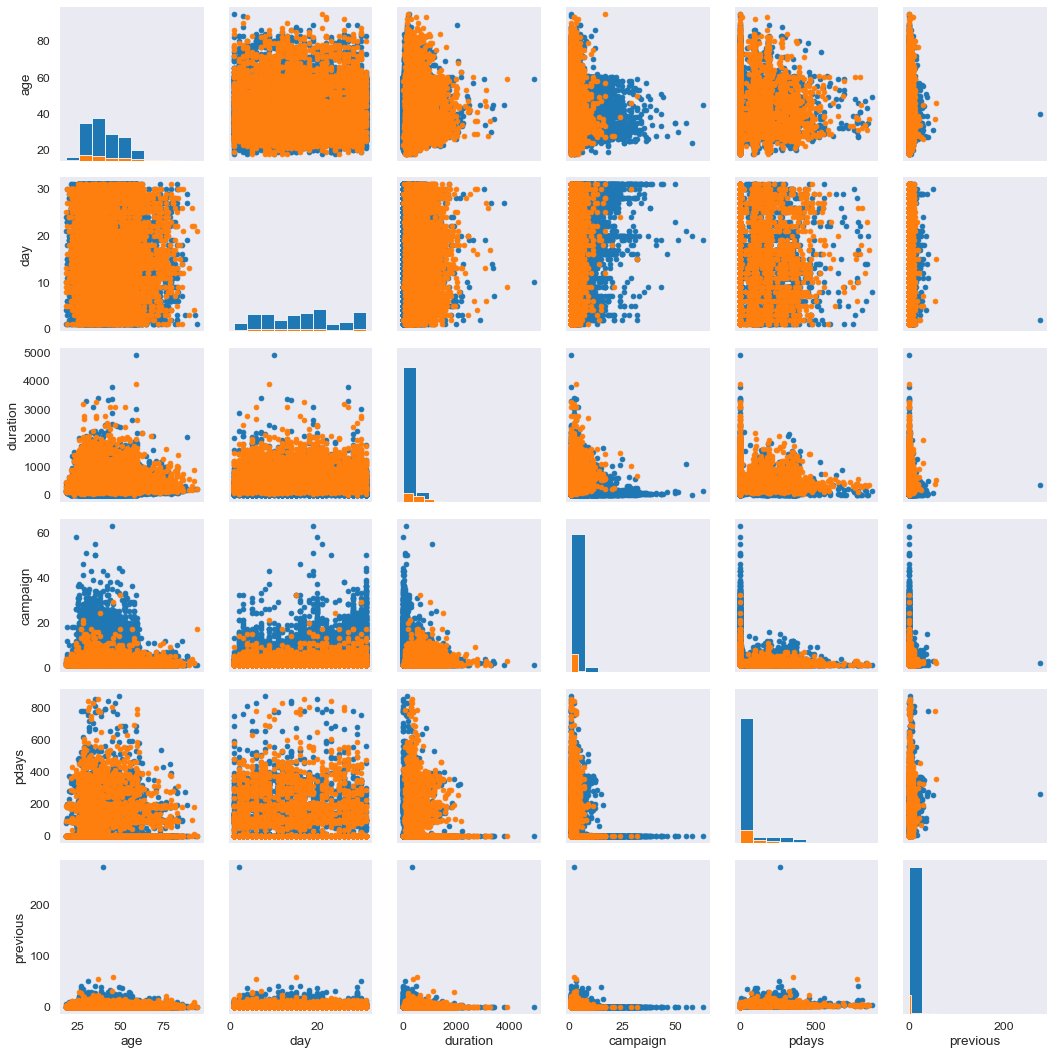

In [110]:
sns.PairGrid(df, hue='y').map_diag(plt.hist).map_offdiag(plt.scatter);

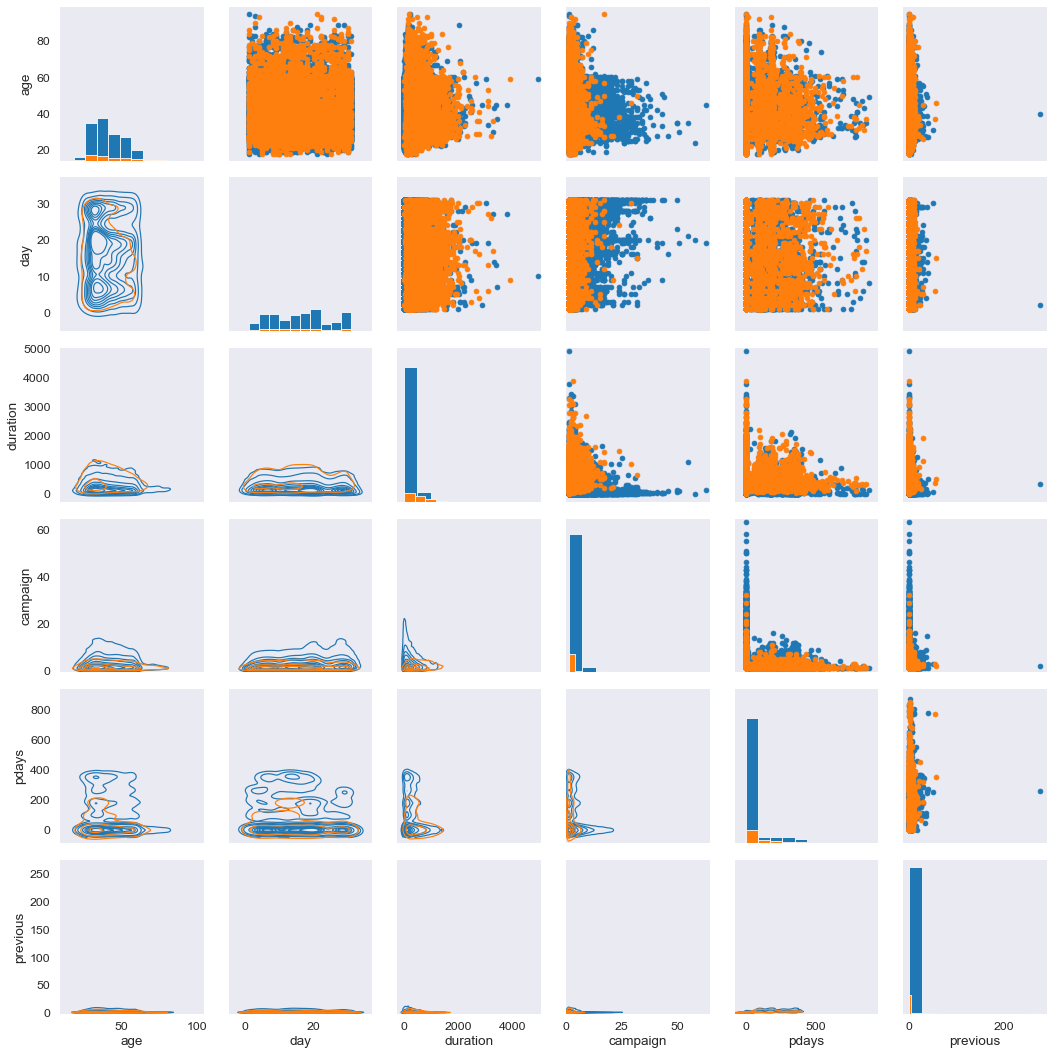

In [113]:
sns.PairGrid(df, hue='y').map_diag(plt.hist).map_upper(plt.scatter).map_lower(sns.kdeplot)

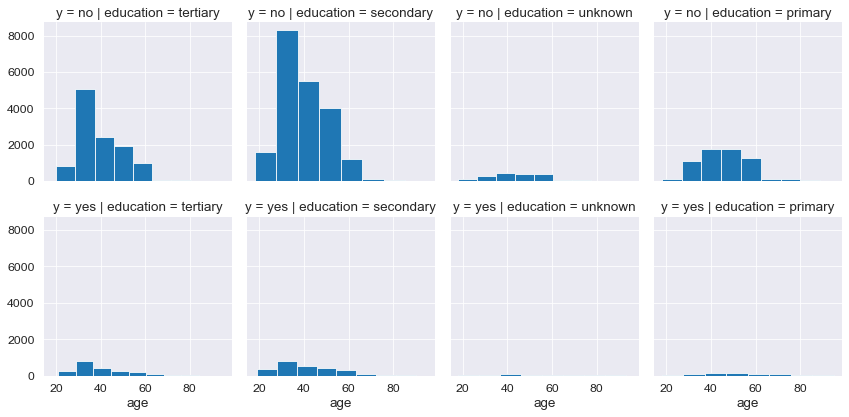

In [128]:
df_fg = sns.FacetGrid(df, col='education', row='y')
df_fg.map(plt.hist, 'age', bins=8);

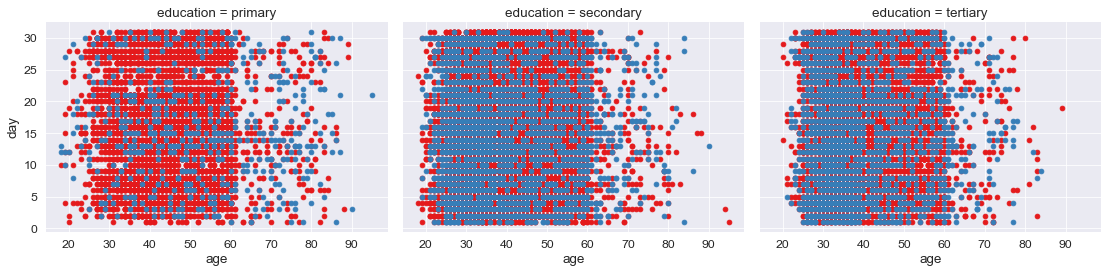

In [132]:
df_fg = sns.FacetGrid(df, col='education', hue='y', height=4, aspect=1.3, col_order=['primary', 'secondary', 'tertiary'], palette='Set1')
df_fg.map(plt.scatter, 'age', 'day');

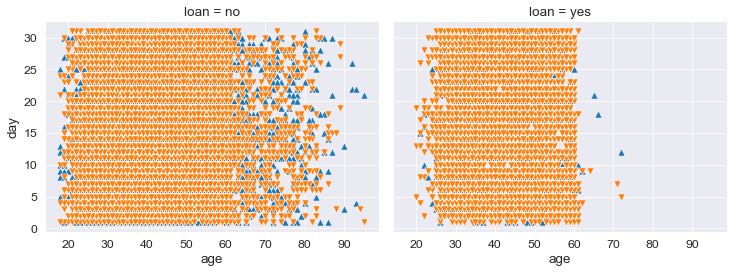

In [134]:
kws = dict(s=50, linewidth=0.5, edgecolor='w')
df_fg = sns.FacetGrid(df, col='loan', hue='y', height=4, aspect=1.3, hue_order=['yes', 'no'], hue_kws=dict(marker=['^', 'v']))
df_fg.map(plt.scatter, 'age', 'day', **kws);

<Figure size 1440x432 with 0 Axes>

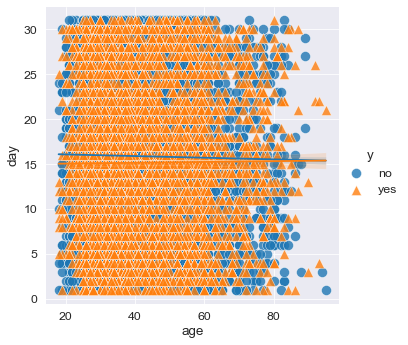

In [138]:
plt.figure(figsize=(20, 6))
sns.lmplot(x='age', y='day', hue='y', data=df, markers=['o', '^'], scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});